<a href="https://colab.research.google.com/github/NeslihanBabaarslan/PANDAS/blob/main/DL_Assignment_3_(Time_Series_with_RNN_Product_Amount_Forecast_by_Time)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [ ]:
df=pd.read_csv("/content/ass_1/IPN31152N.csv", index_col="DATE", parse_dates=True)

In [ ]:
df.head()

,IPN31152N
DATE,
1972-01-01,60.152
1972-02-01,67.273
1972-03-01,74.470
1972-04-01,78.360
1972-05-01,85.032


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 1972-01-01 to 2022-04-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  604 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


In [ ]:
df.columns=["Production "]

In [ ]:
df

,Production
DATE,
1972-01-01,60.152
1972-02-01,67.273
1972-03-01,74.470
1972-04-01,78.360
1972-05-01,85.032
...,...
2021-12-01,82.090
2022-01-01,85.276
2022-02-01,100.132


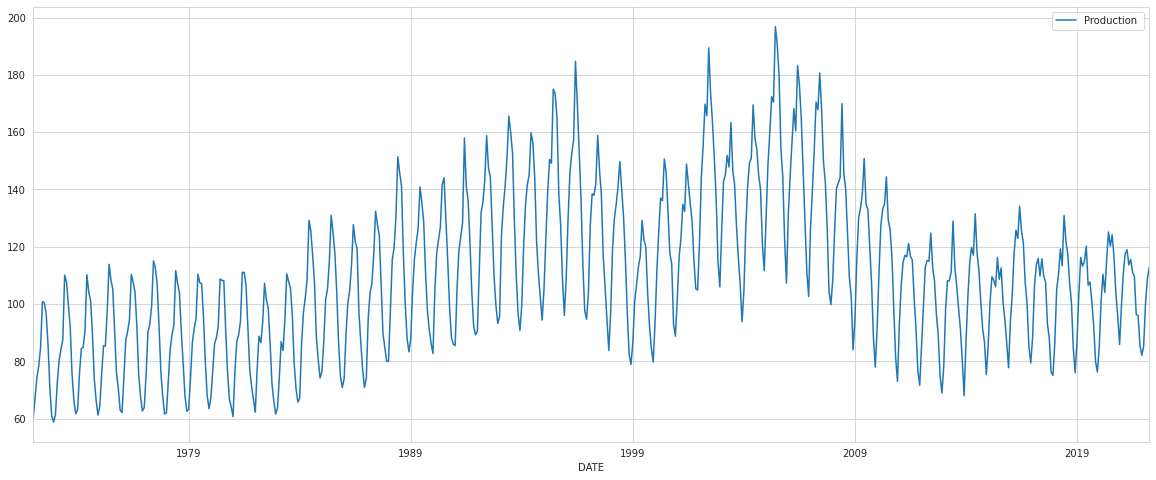

In [ ]:
df.plot(figsize=(20,8));

In [ ]:
test_size=24

# Preprocessing of Data

## Train, test

In [ ]:
test_ind=len(df)-test_size

In [ ]:
test_ind

580

In [ ]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [ ]:
train

,Production
DATE,
1972-01-01,60.152
1972-02-01,67.273
1972-03-01,74.470
1972-04-01,78.360
1972-05-01,85.032
...,...
2019-12-01,76.305
2020-01-01,84.888
2020-02-01,100.794


In [ ]:
len(train)

580

In [ ]:
test

,Production
DATE,
2020-05-01,115.302
2020-06-01,125.200
2020-07-01,120.213
2020-08-01,124.201
2020-09-01,116.322
2020-10-01,103.584
2020-11-01,95.814
2020-12-01,85.881
2021-01-01,99.351


In [ ]:
len(test)

24

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
train_scaled=scaler.fit_transform(train)
test_scaled=scaler.transform(test)

## Time Series Generator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length=12
batch_size=1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [ ]:
len(generator)

568

In [ ]:
generator[0]

(array([[[0.00946792],
         [0.06107946],
         [0.11324473],
         [0.14143469],
         [0.18979772],
         [0.30491313],
         [0.30149792],
         [0.274119  ],
         [0.19733843],
         [0.08531424],
         [0.01561414],
         [0.        ]]]), array([[0.01773922]]))

In [ ]:
X,y=generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00946792 0.06107946 0.11324473 0.14143469 0.18979772 0.30491313
 0.30149792 0.274119   0.19733843 0.08531424 0.01561414 0.        ]
Predict this y: 
 [[0.01773922]]


# Modelling & Model Performance

## with "tanh" activation function

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
train_scaled.shape

(580, 1)

In [ ]:
n_features = train_scaled.shape[1]

In [ ]:
model = Sequential()
model.add(LSTM(120, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(60, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 120)           58560     
                                                                 
 lstm_1 (LSTM)               (None, 60)                43440     
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 102,061
Trainable params: 102,061
Non-trainable params: 0
_________________________________________________________________


### Evaluation on Test Data

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [ ]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [ ]:
len(validation_generator)

12

In [ ]:
model.fit(x = generator,
          epochs = 140,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/140
568/568 [==============================] - 14s 15ms/step - loss: 0.0215 - val_loss: 0.0112
Epoch 2/140
568/568 [==============================] - 8s 14ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 3/140
568/568 [==============================] - 8s 13ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 4/140
568/568 [==============================] - 9s 16ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 5/140
568/568 [==============================] - 7s 13ms/step - loss: 0.0041 - val_loss: 0.0067
Epoch 6/140
568/568 [==============================] - 7s 13ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 7/140
568/568 [==============================] - 7s 13ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 8/140
568/568 [==============================] - 7s 13ms/step - loss: 0.0037 - val_loss: 0.0045
Epoch 9/140
568/568 [==============================] - 8s 13ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 10/140
568/568 [==============================] - 7s 13ms/step - loss: 0.00

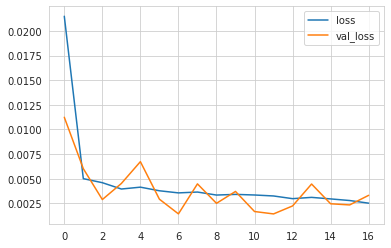

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#evaluation on test data

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [ ]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [ ]:
predictions_scaled

[array([0.37081727], dtype=float32),
 array([0.3734907], dtype=float32),
 array([0.3418957], dtype=float32),
 array([0.28282672], dtype=float32),
 array([0.2033583], dtype=float32),
 array([0.12704931], dtype=float32),
 array([0.08345479], dtype=float32),
 array([0.09189577], dtype=float32),
 array([0.1380122], dtype=float32),
 array([0.19223158], dtype=float32),
 array([0.23836505], dtype=float32),
 array([0.27339125], dtype=float32)]

In [ ]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -2.522207579829364 
mae: 0.15219714104907775 
mse: 0.025685628990259845 
rmse: 0.16026736720324522


### Inverse Transformation and Comparing

In [ ]:
predictions = scaler.inverse_transform(predictions_scaled)

In [ ]:
compare = test[:12]

In [ ]:
compare['Predictions'] = predictions

In [ ]:
compare

,Production,Predictions
DATE,,
2020-05-01,115.302,110.008
2020-06-01,125.200,110.377
2020-07-01,120.213,106.017
2020-08-01,124.201,97.868
2020-09-01,116.322,86.903
2020-10-01,103.584,76.375
2020-11-01,95.814,70.360
2020-12-01,85.881,71.525
2021-01-01,99.351,77.887


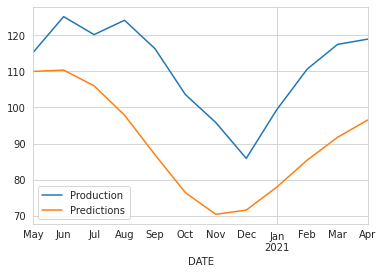

In [ ]:
compare.plot()

In [ ]:
eval_metrics(compare.Production, compare.Predictions)

AttributeError: ignored

## with "relu" activation function

### Evaluation on Test Data

### Inverse Transformation and Comparing

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___